# This project is an attempt to analyze stats scraped from a database website, stats.nba.com, that holds NBA information to look at trends within the data.

# These libraries will allow for me to scrape the data from my online source, plot and graph the data, process the data through data analysis functions, and come up with a conclusion for what I have found.

In [26]:
import requests
import pandas as pd
import os
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from numpy import *
import numpy as ab
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import *

## In order to gather the data that I need, I have to request it from stats.nba.com. To do this, I most request this information by using a user header. Many websites only allow computer identities to scrape their data. After doing this I created the base URL and set the parameters that I will be collecting for the data.

In [32]:
# Request to api for NBA. so we have to pretend we are a browser by setting this user agent header.
user_agent_headers = {'user-agent':
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.95 Safari/537.36'}


In [33]:
# Base url: Stats for players.
baseURL_playerstat = 'http://stats.nba.com/stats/leaguedashplayerstats?'


In [34]:
# Parameters for the data being pulled.
parameters_playerstat = {
            'College': '',
            'Conference': '',
            'Country': '',
            'DateFrom': '',
            'DateTo': '',
            'Division': '',
            'DraftPick': '',
            'DraftYear': '',
            'GameScope': '',
            'GameSegment': '',
            'Height': '',
            'LastNGames': 0,
            'LeagueID': '00',
            'Location': '',
            'MeasureType': 'Base',
            'Month': 0,
            'OpponentTeamID': 0,
            'Outcome': '',
            'PORound': 0,
            'PaceAdjust': 'N',
            'PerMode': 'PerGame',
            'Period': 0,
            'PlayerExperience': '',
            'PlayerPosition': '',
            'PlusMinus': 'N',
            'Rank': 'N',
            'Season': '2016-17',
            'SeasonSegment': '',
            'SeasonType': 'Regular Season',
            'ShotClockRange': '',
            'StarterBench': '',
            'TeamID': 0,
            'VsConference': '',
            'VsDivision': '',
            'Weight': '',
        }



## This function formulates a data structure that will hold the parameters that are scraped from the URL. After this, I will set a variable to the dataframe, clean the data, and then present a table of the data that I collected.

In [35]:
# returns dataframe given base url, parameters.
def scrapeURL(baseURL, parameters):
    response = requests.get(baseURL, params=parameters, headers=user_agent_headers)
    response.raise_for_status()
    headers = response.json()['resultSets'][0]['headers']
    stats = response.json()['resultSets'][0]['rowSet']
    stats_df = pd.DataFrame(stats, columns=headers)
    stats_df['Season'] = parameters['Season']
    stats_df.drop(['CFID', 'CFPARAMS'], axis=1, inplace=True)
    return stats_df



In [66]:
#Creates a variable that holds the dataframe
df = scrapeURL(baseURL_playerstat, parameters_playerstat)


#Cleans the data. Removes the "NA" within the data so that it will be more consistent.
df.fillna(0, inplace=True)


#Presenting the data
df.head()

df.to_csv('sampledata.csv', header=df.columns.values, index=False)

df[0:]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,Season
0,1627773,AJ Hammons,1610612742,DAL,24.0,22,4,18,0.182,7.4,...,92,329,401,397,439,219,430,222,24,2016-17
1,201166,Aaron Brooks,1610612754,IND,32.0,65,36,29,0.554,13.7,...,345,341,311,335,331,248,362,222,24,2016-17
2,203932,Aaron Gordon,1610612753,ORL,21.0,80,29,51,0.363,28.7,...,117,111,135,116,101,361,113,80,24,2016-17
3,1626151,Aaron Harrison,1610612766,CHA,22.0,5,2,3,0.400,3.3,...,447,455,463,462,482,287,480,222,24,2016-17
4,203940,Adreian Payne,1610612750,MIN,26.0,18,5,13,0.278,7.5,...,176,445,219,368,379,154,387,222,24,2016-17
5,201143,Al Horford,1610612738,BOS,31.0,68,46,22,0.676,32.3,...,22,218,155,151,78,43,46,71,24,2016-17
6,2744,Al Jefferson,1610612754,IND,32.0,66,33,33,0.500,14.1,...,264,145,184,268,202,327,242,168,24,2016-17
7,202329,Al-Farouq Aminu,1610612757,POR,26.0,61,33,28,0.541,29.1,...,72,204,244,143,186,168,119,108,24,2016-17
8,101187,Alan Anderson,1610612746,LAC,34.0,30,20,10,0.667,10.3,...,447,455,365,389,407,398,453,222,24,2016-17
9,1626210,Alan Williams,1610612756,PHX,24.0,47,11,36,0.234,15.1,...,79,184,45,115,221,188,189,36,24,2016-17


## This is where I will focus on the Field Goals Made (FGM) and the Free Throws Made (FTM). The data will be shown on a scatter plot. I will then calculate the mean and standard deviation of the FGM and FTM.

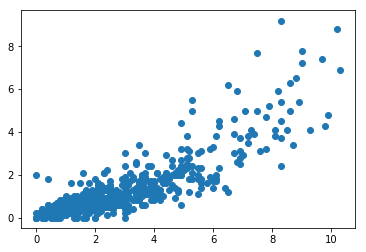

In [38]:
# plot field goals made against free throws made
plt.scatter(df['FGM'], df['FTM'])
plt.show()




In [40]:
# mean of FGM
mean = ab.mean(df['FGM'])

# mean of FTM
meanb = ab.mean(df['FTM'])

# standard deviation to compare FGM
std = ab.std(df['FGM'])

# standard deviation to compare FTM
stdb = ab.std(df['FTM'])

print("mean: " + str(mean))
print("mean: " + str(meanb))
print ("standard deviation: " + str(std))
print ("standard deviation: " + str(stdb))

mean: 3.1201646090534987
mean: 1.424897119341564
standard deviation: 2.1560720967732294
standard deviation: 1.428018242364809


## The polyfit helps calculate the "m" and "b" coefficients for the formula of the line of best fit. The equation of the line follows the format "y = mx + b". I will use this line to examine the correlation of the FGM and FTM. I will plot the data again without the line of best fit and then present a plot with the line of best fit. The formula for the line will be shown after the graph with the line of best fit.

In [41]:
p1 = polyfit(df['FGM'],df['FTM'],1)
print(p1)

[ 0.55631747 -0.31090496]


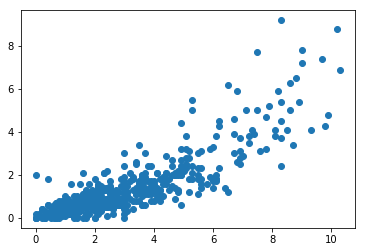

In [42]:
plot(df['FGM'],df['FTM'],'o')
show()

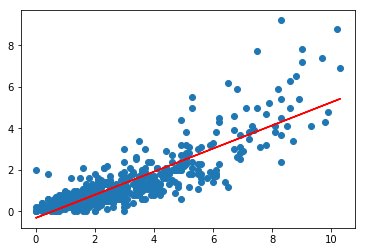

In [43]:
plot(df['FGM'],df['FTM'],'o')
plot(df['FGM'], polyval(p1,df['FGM']), 'r-')
show()

In [44]:
model=LinearRegression()
model.fit(df[['FGM']],df[['FTM']])
m = model.coef_[0]
b = model.intercept_
print("Formula: y = {0}x + {1}".format(m,b))

Formula: y = [0.55631747]x + [-0.31090496]


## I also examined the information by using histograms to look at the spread of the data. The first graph is for Field Goals Made (FGM) and the second graph is for Free Throws Made (FTM).

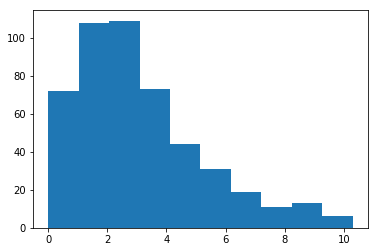

In [60]:
plt.hist(df["FGM"],bins=10, range=None, normed=False, weights=None, density=None)
show()

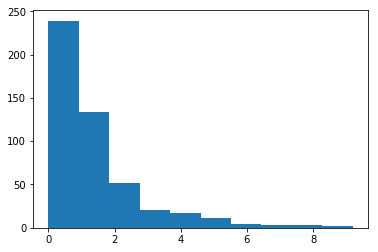

In [61]:
plt.hist(df["FTM"],bins=10, range=None, normed=False, weights=None, density=None)
show()

## This is an extra step that allows me to look at the data in a 3D diagram. I am learning how to graph information on 3D graphs and I wanted to try it for this project. This 3D diagram shows a slight positive trend in the data.

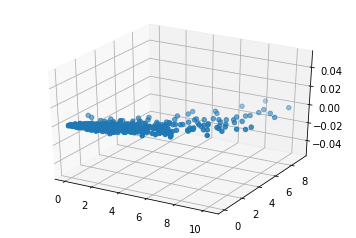

In [62]:
#This is an extra step that I wanted to try for this project.
# I'm learning about 3D graphing and I wanted to implement it within this project

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(xs=df['FGM'], ys=df['FTM'], zs=0, zdir='z', s=20, c=None, depthshade=True)
plt.show()

# To conclude, the data above shows that there is a positive correlation between Field Goals Made (FGM) and Free Throws Made (FTM). This can be seen from the scatter plot with the line of best fit. The line has a positive slope and it shows an incline as the data progresses. This means that the more shots an athlete makes in the NBA, the more free throws they tend to make.